<a href="https://colab.research.google.com/github/GyanGartia/Machine-Learning/blob/main/lab_6_linear_reg_FF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LINEAR REGRESSION ON FOREST FIRE DATASET**

In [ ]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

**LINEAR REGRESSION ON FOREST FIRE**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dataset/forestfires.csv')
data = data.dropna()

In [ ]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
#Convert categorical variables (months and days) into numerical values
months_table = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
days_table = ['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat']

data['month'] = [months_table.index(month) for month in data['month'] ]
data['day']   = [days_table.index(day)  for day in data['day']   ]

In [ ]:
data['impact'] = [0 if area == 0 else 1 for area in data['area']]
target = data.impact
inputs = data.drop(['area','impact'], axis='columns')

In [ ]:
data.sample(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,impact
190,6,5,2,5,91.2,48.3,97.8,12.5,11.7,33,4.0,0.0,8.31,1
247,2,4,7,3,92.2,91.6,503.6,9.6,20.7,70,2.2,0.0,0.75,1
207,7,5,8,2,91.0,129.5,692.6,7.0,20.7,37,2.2,0.0,17.20,1
129,2,5,9,0,92.6,46.5,691.8,8.8,15.4,35,0.9,0.0,0.00,0
48,4,4,2,1,87.2,23.9,64.7,4.1,11.8,35,1.8,0.0,0.00,0


In [ ]:
data.corr()['area'].sort_values()

RH       -0.075519
rain     -0.007366
ISI       0.008258
wind      0.012317
FFMC      0.040122
Y         0.044873
day       0.048359
DC        0.049383
month     0.056496
X         0.063385
DMC       0.072994
temp      0.097844
impact    0.193224
area      1.000000
Name: area, dtype: float64

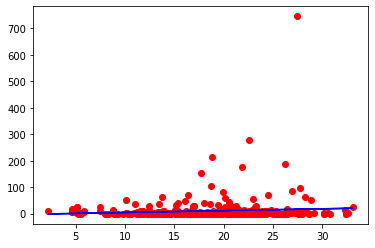

In [ ]:
# TEMP VS AREA
df = data[['temp', 'area']]

# inputs = df.temp
# target = df.impact
inputs = df.iloc[:, :-1].values
target = df.iloc[:, 1].values

x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2,  random_state = 0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(x_test)

# Visualising the Training set results
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')

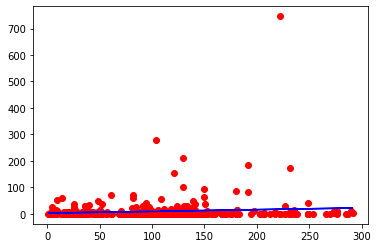

In [ ]:
# DMC VS AREA
df = data[['DMC', 'area']]

# inputs = df.temp
# target = df.impact
inputs = df.iloc[:, :-1].values
target = df.iloc[:, 1].values

x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2,  random_state = 0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(x_test)

# Visualising the Training set results
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')

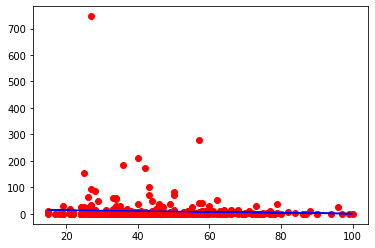

In [ ]:
# RH VS AREA
df = data[['RH', 'area']]

# inputs = df.temp
# target = df.impact
inputs = df.iloc[:, :-1].values
target = df.iloc[:, 1].values

x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2,  random_state = 0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(x_test)

# Visualising the Training set results
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')

After scaling:

In [ ]:
#standardization of data
# scaler = StandardScaler()
scaler = MinMaxScaler()

t_df = data.drop('impact', axis =1)

#fitting forest fire dataset to scaler by removing the attribute output
scaler.fit(t_df)

scaled_features = scaler.transform(t_df)
# scaled_features = scaler.transform(data.drop('area',axis=1))
new_data= pd.DataFrame(scaled_features,columns=data.columns[:-1])
new_data.sample(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
130,0.375,0.571429,0.090909,1.000000,0.638710,0.070296,0.092999,0.014260,0.424437,0.294118,0.255556,0.00000,0.000000
42,0.375,0.285714,0.636364,0.333333,0.981935,0.369400,0.749619,0.303030,0.463023,0.458824,0.555556,0.00000,0.000000
161,0.625,0.285714,0.636364,0.666667,0.987097,0.450034,0.669520,0.185383,0.581994,0.305882,0.400000,0.00000,0.001742
11,0.750,0.428571,0.727273,1.000000,0.956129,0.248449,0.826903,0.402852,0.549839,0.270588,0.400000,0.00000,0.000000
57,0.375,0.142857,0.818182,0.000000,0.953548,0.156444,0.802041,0.156863,0.372990,0.411765,0.255556,0.00000,0.000000
407,0.375,0.428571,0.090909,1.000000,0.851613,0.024466,0.055236,0.051693,0.385852,0.364706,0.400000,0.00000,0.000000
425,0.125,0.000000,0.636364,0.666667,0.940645,0.852171,0.874751,0.112299,0.585209,0.482353,0.200000,0.00000,0.000000
8,0.875,0.571429,0.727273,0.333333,0.932903,0.442453,0.802979,0.124777,0.350482,0.564706,0.555556,0.00000,0.000000
243,0.750,0.285714,0.636364,0.000000,0.943226,0.599586,0.812478,0.245989,0.633441,0.682353,0.800000,0.15625,0.000000
387,0.500,0.428571,0.181818,0.666667,0.931613,0.061337,0.026621,0.142602,0.302251,0.388235,0.555556,0.00000,0.000000


-0.41679463916066695 %


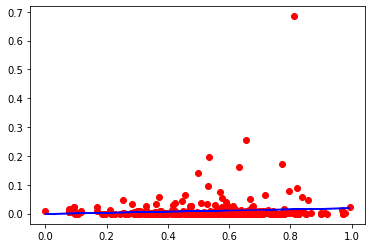

In [ ]:
# TEMP VS AREA
df = new_data[['temp', 'area']]

# inputs = df.temp
# target = df.impact
inputs = df.iloc[:, :-1].values
target = df.iloc[:, 1].values

x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2,  random_state = 0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(x_test)

# Visualising the Training set results
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')

r2_score = regressor.score(x_test,y_test)
print(r2_score*100,'%')
# statistics.append([regressor.f_pvalue, regressor.rsquared])

**LINEAR REGRESSION ON HCV DATASET**

In [ ]:
df = pd.read_excel("Folds5x2_pp.xlsx")

In [ ]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
input = df.drop(['AP','V','RH'], axis=1)

In [ ]:
input = input.dropna()
#dropping the null values
input.head()
#printing the head

,AT,PE
0,14.96,463.26
1,25.18,444.37
2,5.11,488.56
3,20.86,446.48
4,10.82,473.90


In [ ]:
X = input.iloc[:, :-1].values
y = input.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Predicting the Test set results
y_pred = regressor.predict(X_test)

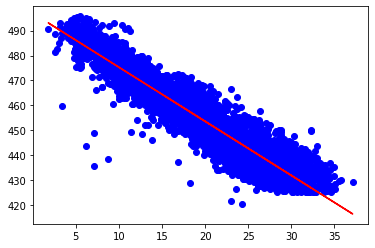

In [ ]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')

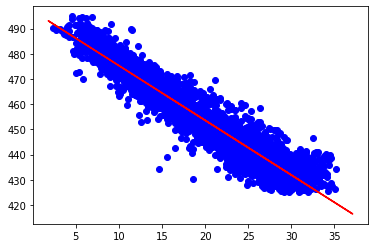

In [ ]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.show()

In [ ]:
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))